# Pulsar Emission Data Analysis

In [122]:
#currently including any and all Imports that maybe needed for the project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.dates as mdates
from scipy.stats import pearsonr

#### Section for extracting from a tar file. ####

##### Currently implemented for original TAR File structure.

In [123]:
#This is also found in the main file under tarunzip.py
import tarfile
import os
import sys

#tar = tarfile.open("pulseTarFile.tar")
#tar.extractall('./Data')
#tar.close()

## Beginning of Exploration

### Examining the data

In this section we are determining the total integrity of the data to determine if further comprehensive data cleaning and uniforming processes are needed.

In [124]:
colnames = ['Pulse Number', 'Brightness', 'Uncertainty']
pulsar1 = pd.read_csv("Data/J0437-4715.pulses", sep = ' ', header = None, names = colnames)
pulsar2 = pd.read_csv("Data/J0835-4510.pulses", sep = ' ', header = None, names = colnames)
pulsar3 = pd.read_csv("Data/J0953+0755.pulses", sep = ' ', header = None, names = colnames)
pulsar4 = pd.read_csv("Data/J1243-6423.pulses", sep = ' ', header = None, names = colnames)
pulsar5 = pd.read_csv("Data/J1456-6843.pulses", sep = ' ', header = None, names = colnames)
pulsar6 = pd.read_csv("Data/J1644-4559.pulses", sep = ' ', header = None, names = colnames)

In [125]:
pulsar1.head(10)

,Pulse Number,Brightness,Uncertainty
0,1,0.598393,0.056431
1,2,0.590859,0.055182
2,3,0.449643,0.063632
3,4,0.682860,0.056269
4,5,0.490026,0.046830
5,6,0.586071,0.052649
6,7,0.150353,0.056483
7,8,0.384684,0.052567
8,9,0.429094,0.055569
9,10,0.995865,0.075811


In [126]:
pulsar1.head(10)

,Pulse Number,Brightness,Uncertainty
0,1,0.598393,0.056431
1,2,0.590859,0.055182
2,3,0.449643,0.063632
3,4,0.682860,0.056269
4,5,0.490026,0.046830
5,6,0.586071,0.052649
6,7,0.150353,0.056483
7,8,0.384684,0.052567
8,9,0.429094,0.055569
9,10,0.995865,0.075811


In [127]:
pulsar2.head(10)

,Pulse Number,Brightness,Uncertainty
0,1,0.984043,0.053831
1,2,2.487928,0.048796
2,3,1.690295,0.025639
3,4,1.196142,0.039539
4,5,1.979783,0.041460
5,6,2.297645,0.054210
6,7,2.322135,0.043554
7,8,2.289047,0.049957
8,9,2.442574,0.025110
9,10,2.136332,0.022712


In [128]:
pulsar3.head(10)

,Pulse Number,Brightness,Uncertainty
0,1,0.334330,0.015570
1,2,-0.098659,0.014051
2,3,0.123514,0.011901
3,4,0.443923,0.014365
4,5,1.590446,0.057785
5,6,1.233848,0.018692
6,7,0.857876,0.022208
7,8,0.254255,0.018185
8,9,0.292077,0.021672
9,10,0.439929,0.046293


In [129]:
pulsar4.head(10)

,Pulse Number,Brightness,Uncertainty
0,1,0.101127,0.001893
1,2,0.012166,0.001814
2,3,0.021918,0.001835
3,4,0.181179,0.002183
4,5,0.000240,0.001725
5,6,0.085866,0.001723
6,7,0.067280,0.001778
7,8,0.092884,0.002438
8,9,0.083350,0.002101
9,10,0.087871,0.001941


In [130]:
pulsar5.head(10)

,Pulse Number,Brightness,Uncertainty
0,1,0.053904,0.005560
1,2,0.058653,0.004821
2,3,0.110208,0.005196
3,4,0.034716,0.004729
4,5,0.056101,0.004619
5,6,0.046168,0.005074
6,7,0.055648,0.004916
7,8,0.060890,0.004581
8,9,0.024388,0.004922
9,10,0.039370,0.004633


In [131]:
pulsar6.head(10)

,Pulse Number,Brightness,Uncertainty
0,1,0.634671,0.002761
1,2,0.736945,0.005207
2,3,0.693834,0.002706
3,4,1.021866,0.010184
4,5,0.673845,0.006236
5,6,0.676883,0.004763
6,7,0.527039,0.002422
7,8,0.673417,0.003174
8,9,0.357076,0.002848
9,10,0.661704,0.005588


In [132]:
print(pulsar1.shape)
print(pulsar2.shape)
print(pulsar3.shape)
print(pulsar4.shape)
print(pulsar5.shape)
print(pulsar6.shape)

(27000, 3)
(1331, 3)
(14329, 3)
(1819, 3)
(1219, 3)
(698, 3)


In [133]:
pulsar1[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,27000.000000,27000.000000
mean,0.536400,0.062556
std,0.413764,0.056313
min,-5.114133,0.015426
25%,0.296443,0.052381
50%,0.423816,0.056856
75%,0.643723,0.063111
max,18.722410,3.049559


In [134]:
pulsar2[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,1331.000000,1331.000000
mean,2.248107,0.039495
std,0.591161,0.013056
min,0.633413,0.012888
25%,1.825375,0.030223
50%,2.255182,0.037513
75%,2.682259,0.046771
max,4.050718,0.098902


In [135]:
pulsar3[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,14329.000000,14329.000000
mean,0.994458,0.034561
std,1.211127,0.029641
min,-0.219110,0.010120
25%,0.184157,0.014351
50%,0.481894,0.021999
75%,1.337406,0.043380
max,8.552022,0.242041


In [136]:
pulsar4[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,1819.000000,1819.000000
mean,0.075070,0.001958
std,0.057006,0.000306
min,-0.004643,0.001532
25%,0.019738,0.001774
50%,0.076660,0.001872
75%,0.112285,0.002041
max,0.269903,0.005952


In [137]:
pulsar5[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,1219.000000,1219.000000
mean,0.104176,0.005410
std,0.081916,0.001282
min,-0.007285,0.001075
25%,0.045763,0.004728
50%,0.081228,0.004966
75%,0.144228,0.005541
max,0.825366,0.016201


In [138]:
pulsar6[["Brightness", "Uncertainty"]].describe()

,Brightness,Uncertainty
count,698.000000,698.000000
mean,0.654319,0.004445
std,0.163945,0.001855
min,0.007642,0.002129
25%,0.555267,0.003086
50%,0.658295,0.003951
75%,0.753396,0.005349
max,1.159334,0.016097


<AxesSubplot:>

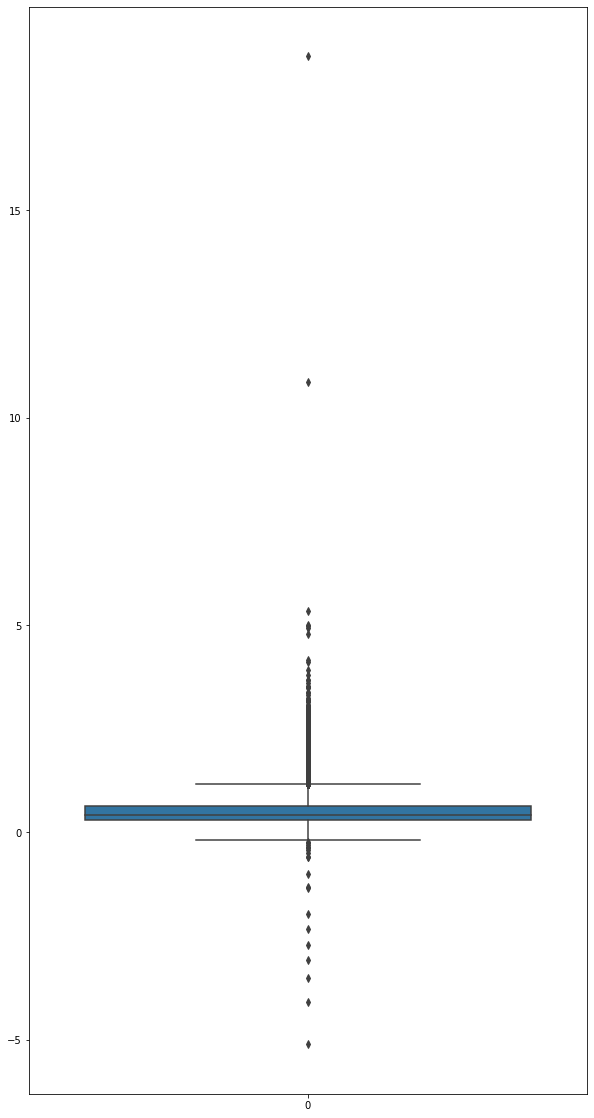

In [139]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar1["Brightness"])

<AxesSubplot:>

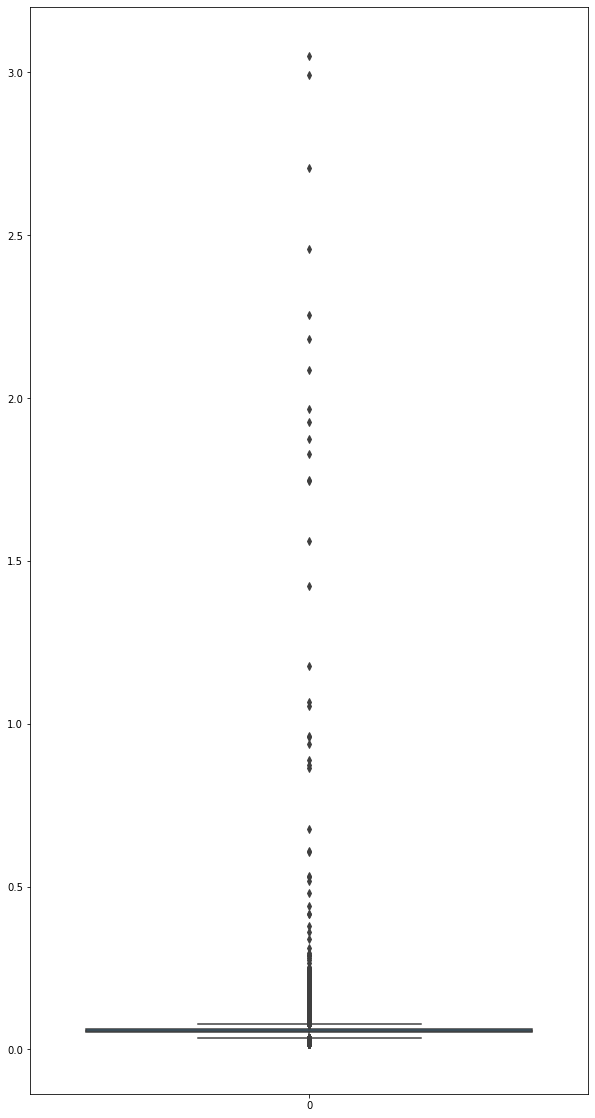

In [140]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar1["Uncertainty"])

<AxesSubplot:>

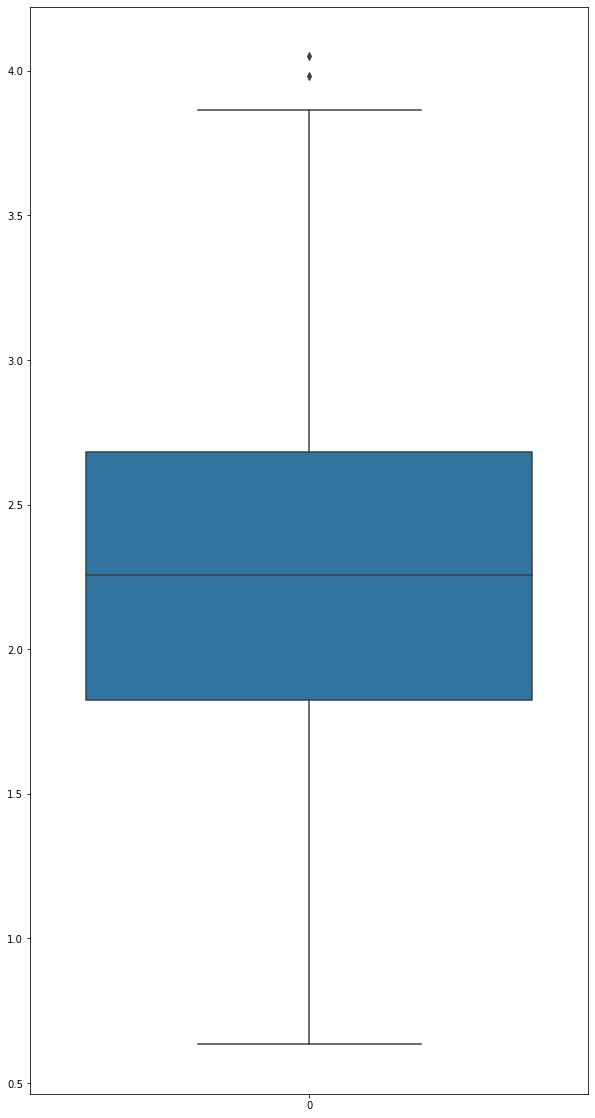

In [141]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar2["Brightness"])

<AxesSubplot:>

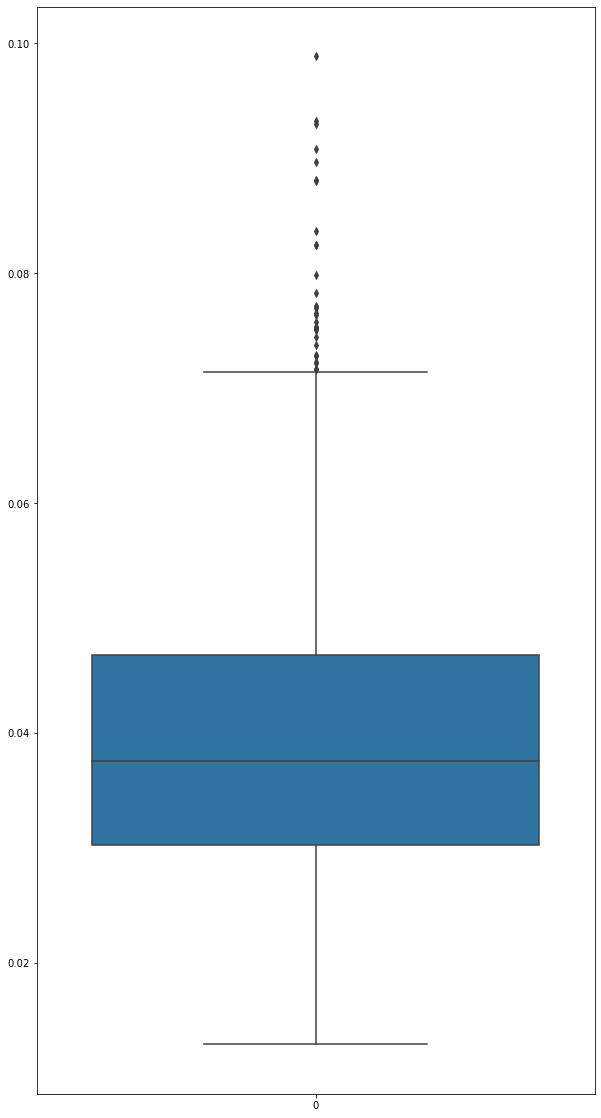

In [142]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar2["Uncertainty"])

<AxesSubplot:>

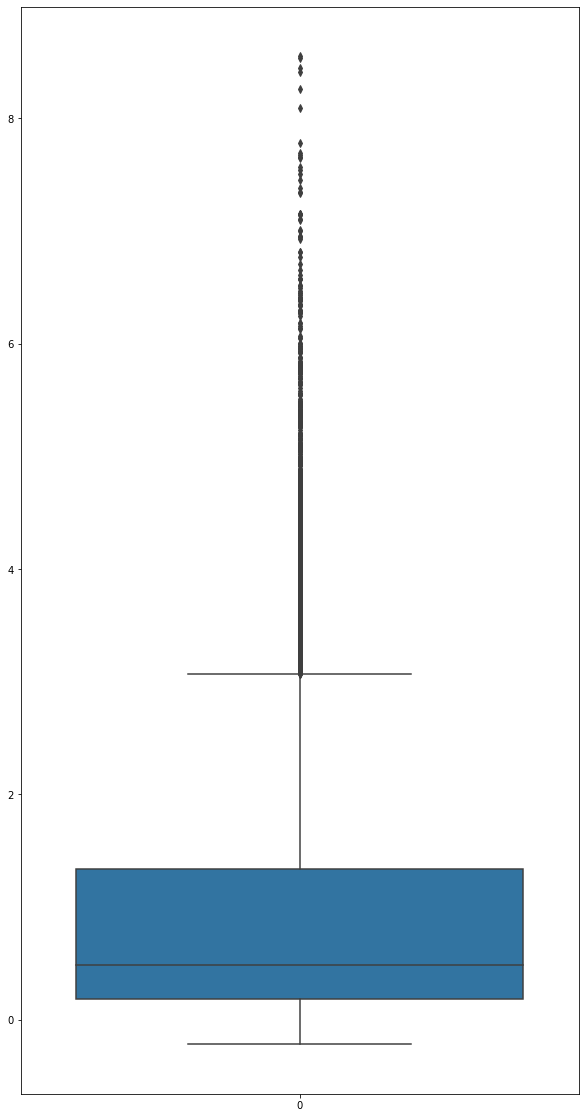

In [143]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar3["Brightness"])

<AxesSubplot:>

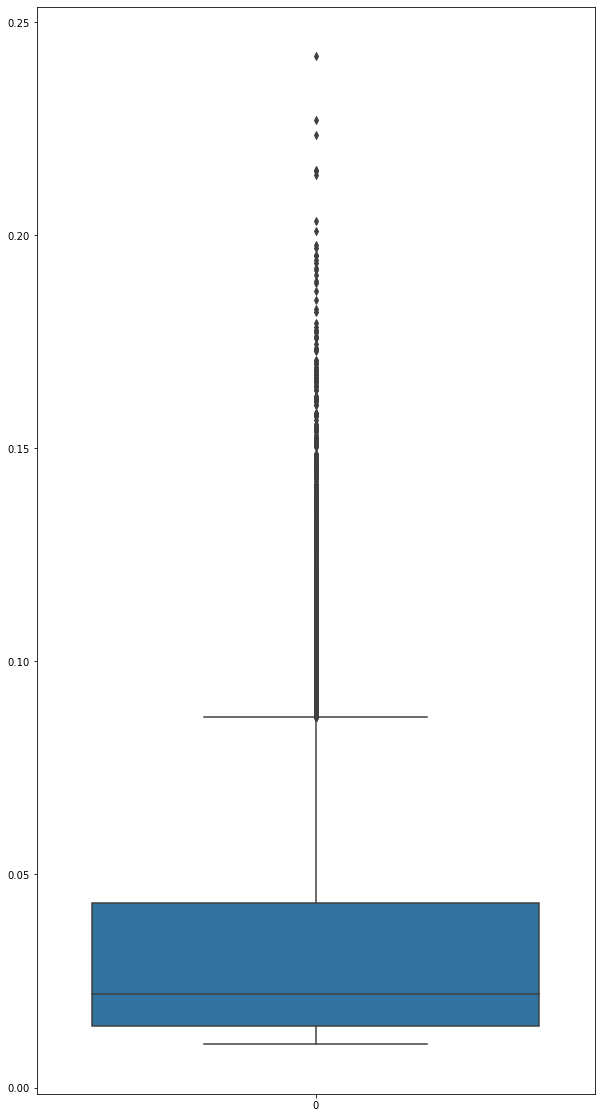

In [144]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar3["Uncertainty"])

<AxesSubplot:>

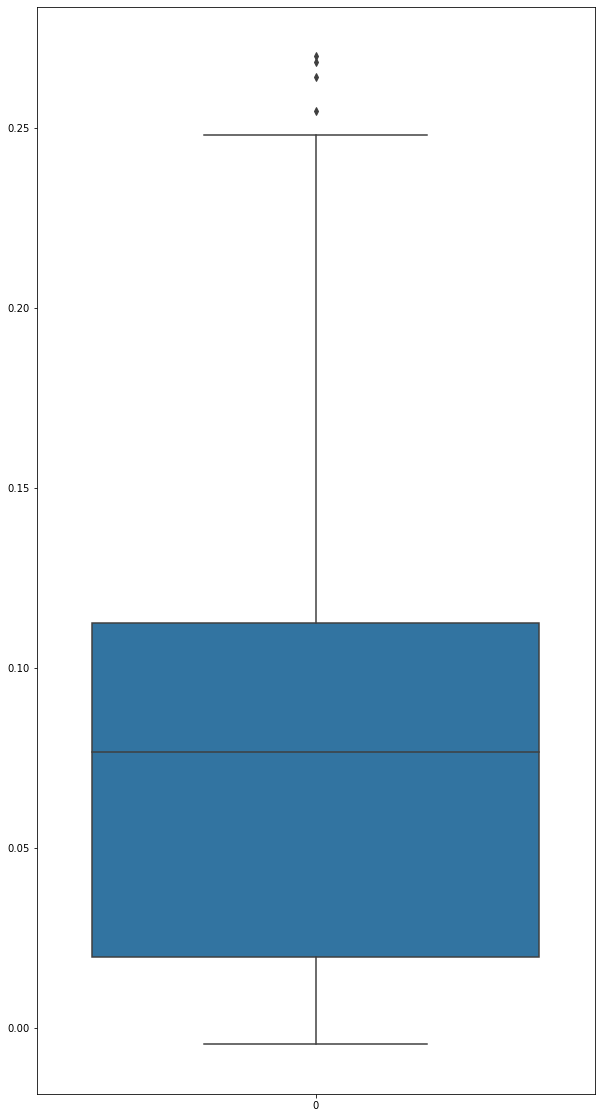

In [145]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar4["Brightness"])

<AxesSubplot:>

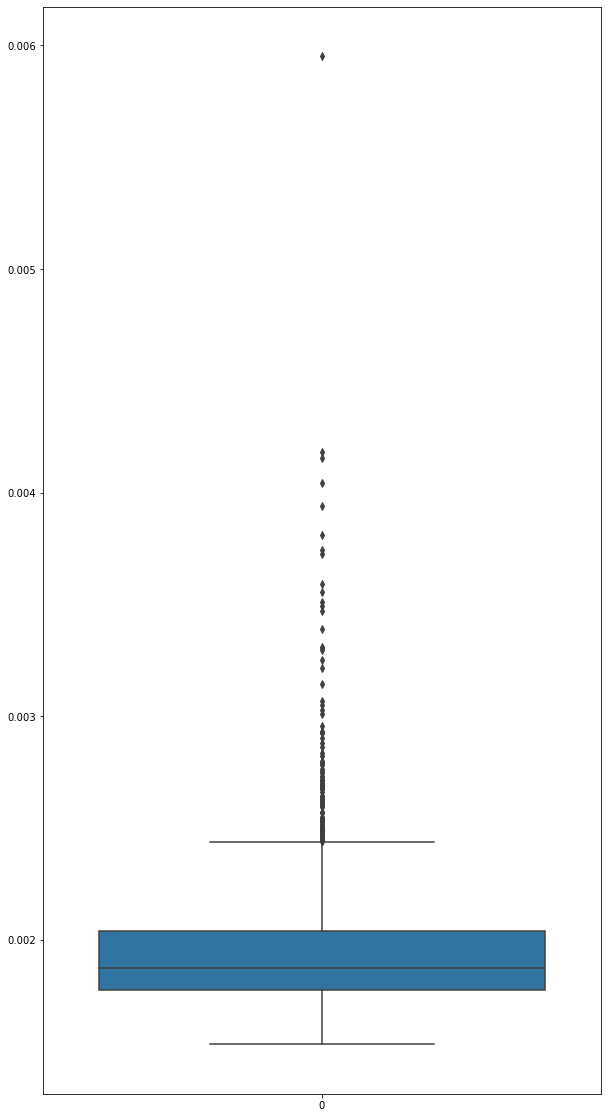

In [146]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar4["Uncertainty"])

<AxesSubplot:>

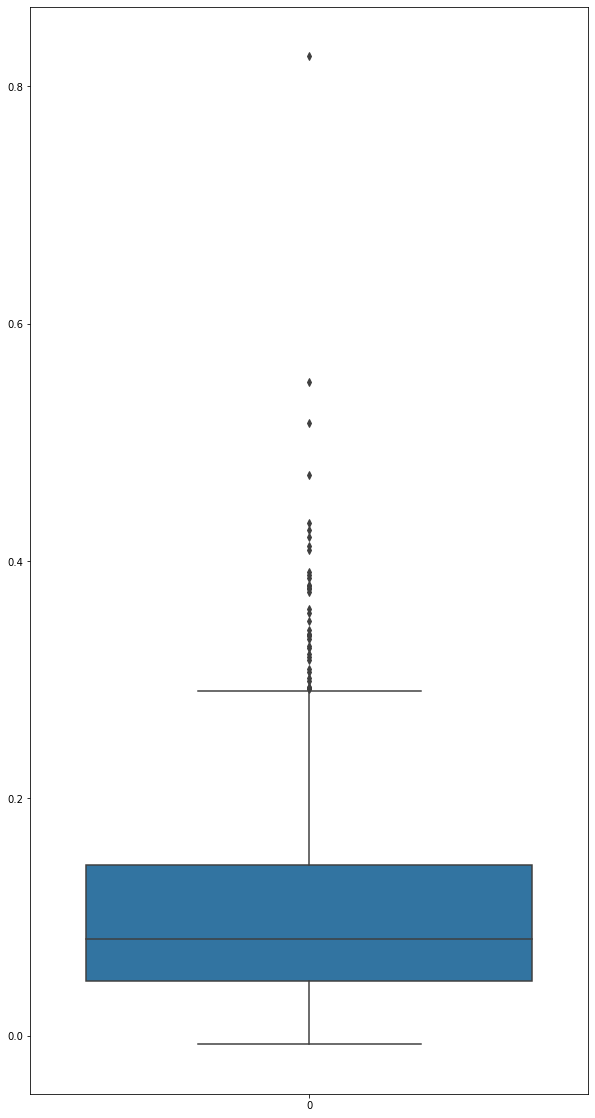

In [147]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar5["Brightness"])

<AxesSubplot:>

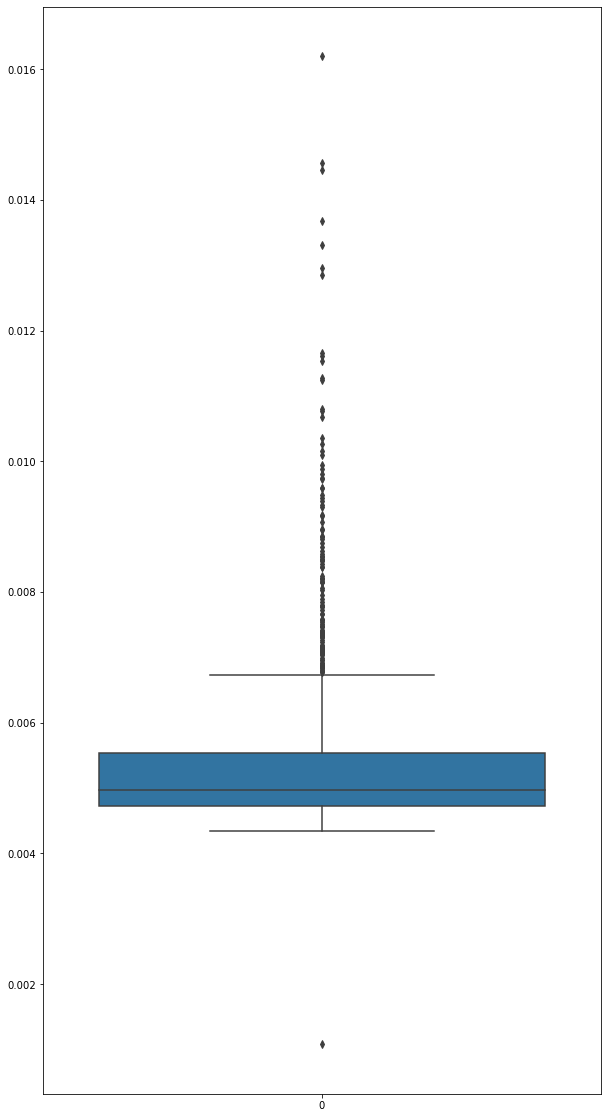

In [148]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar5["Uncertainty"])

<AxesSubplot:>

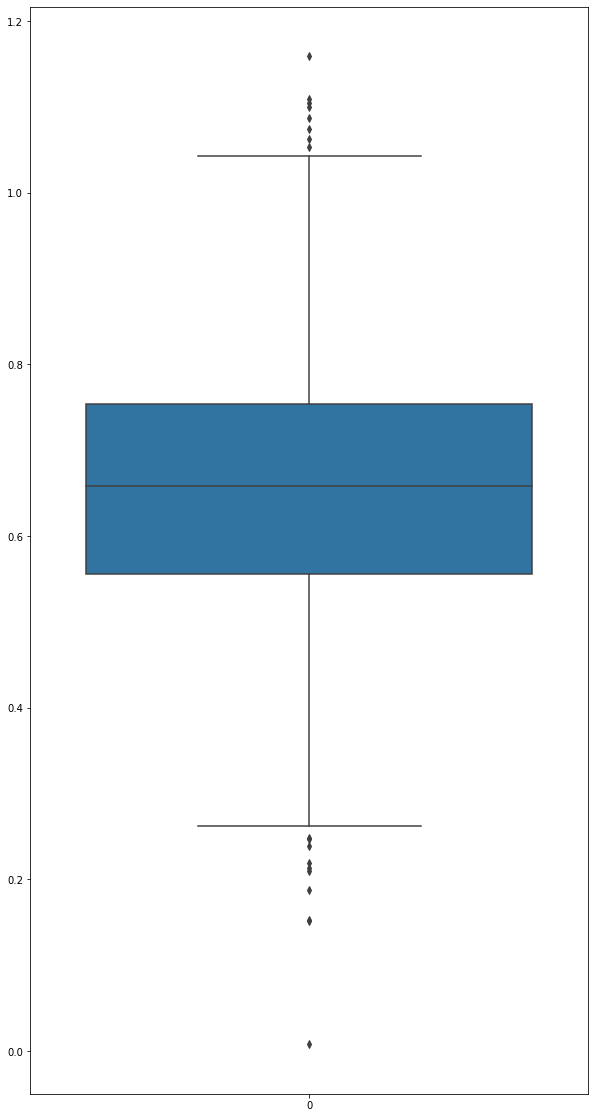

In [149]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar6["Brightness"])

<AxesSubplot:>

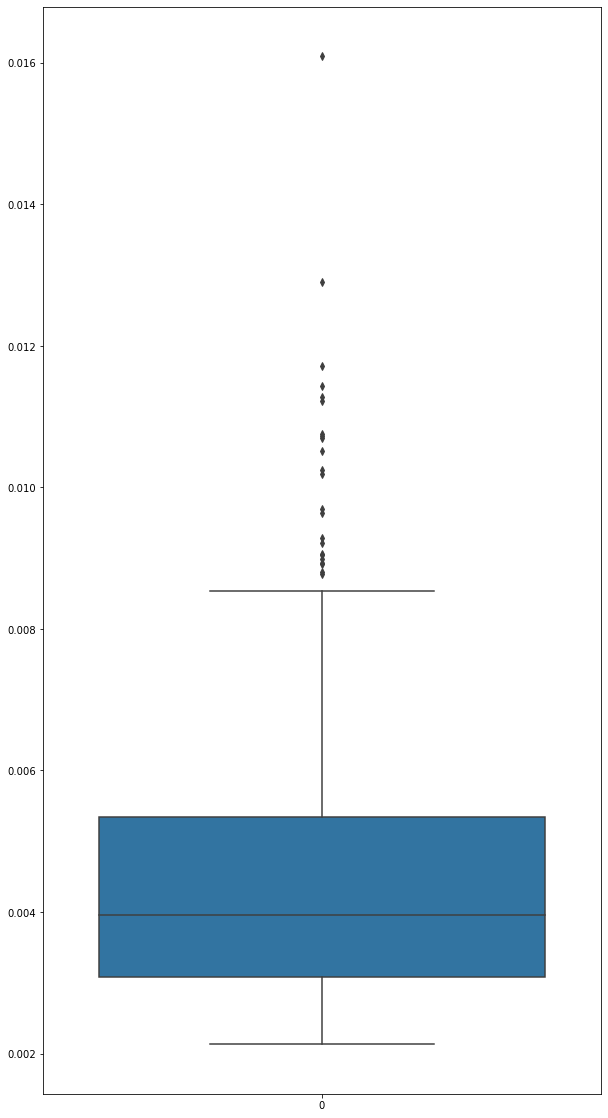

In [150]:
plt.figure(figsize=(10,20))
sns.boxplot(data=pulsar6["Uncertainty"])

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

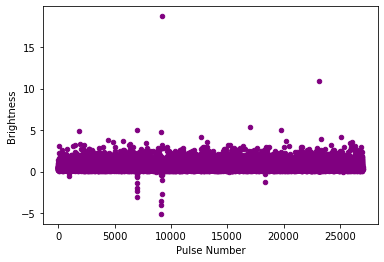

In [151]:
pulsar1.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

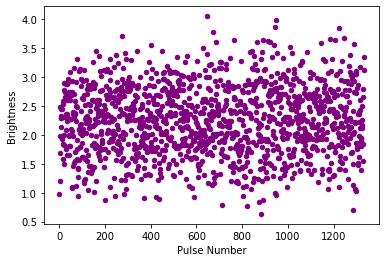

In [152]:
pulsar2.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

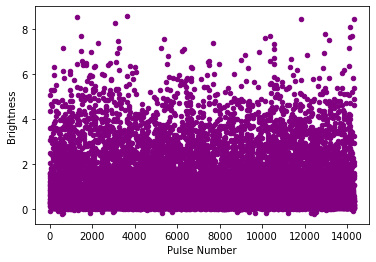

In [153]:
pulsar3.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

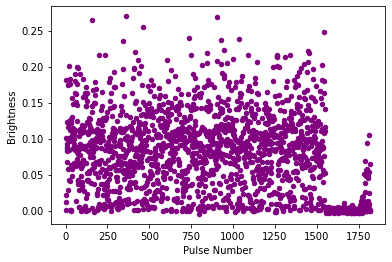

In [154]:
pulsar4.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

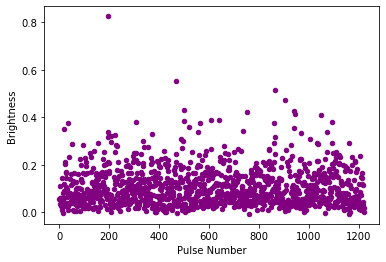

In [155]:
pulsar5.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

<AxesSubplot:xlabel='Pulse Number', ylabel='Brightness'>

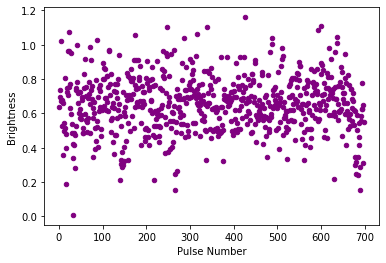

In [156]:
pulsar6.plot.scatter(x='Pulse Number', y='Brightness', c='purple')

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

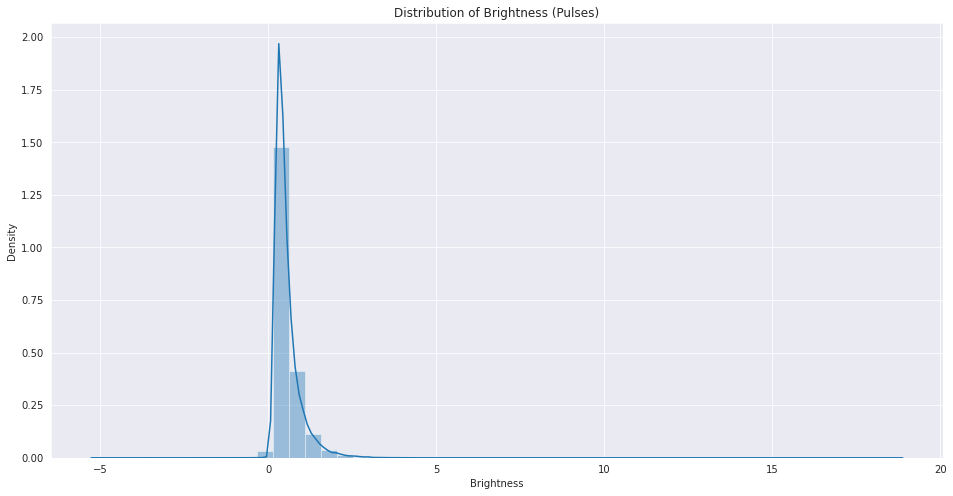

In [157]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar1.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

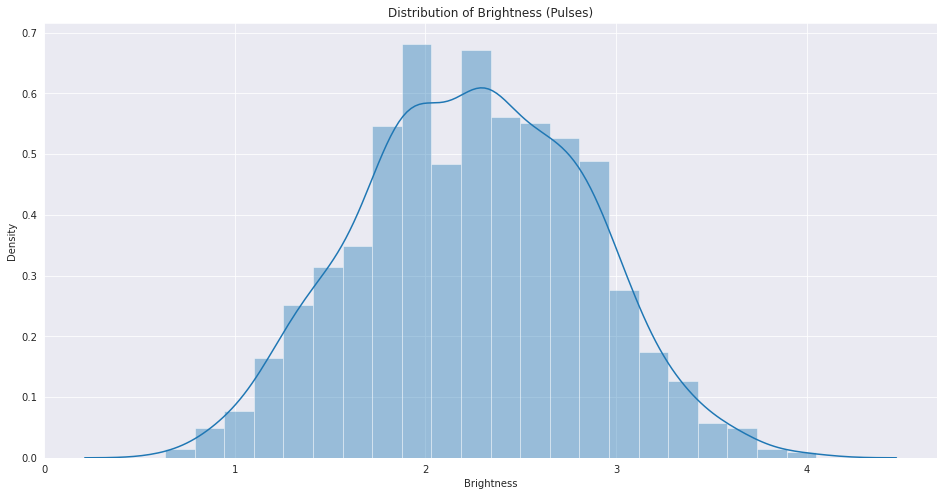

In [158]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar2.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

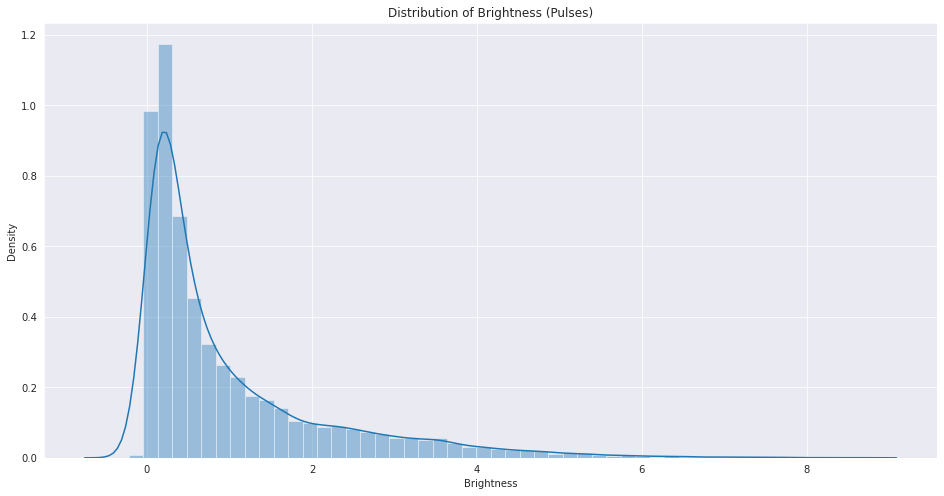

In [159]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar3.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

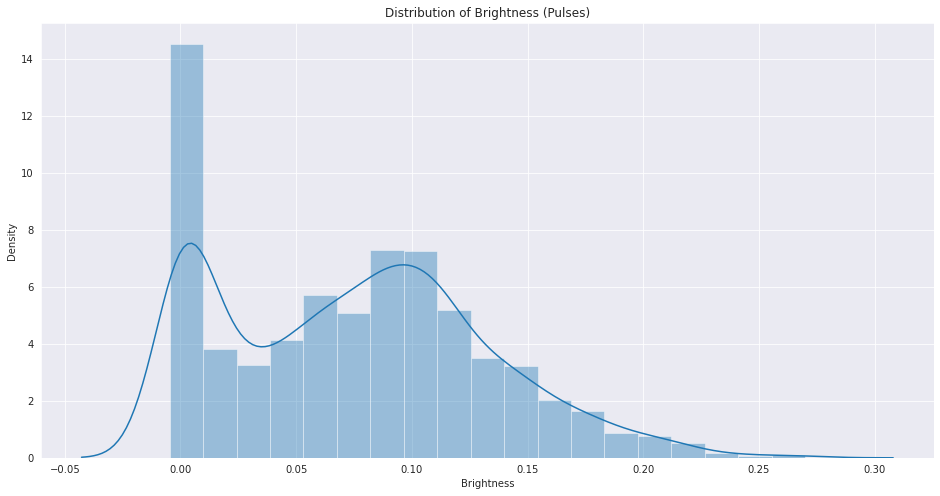

In [160]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar4.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

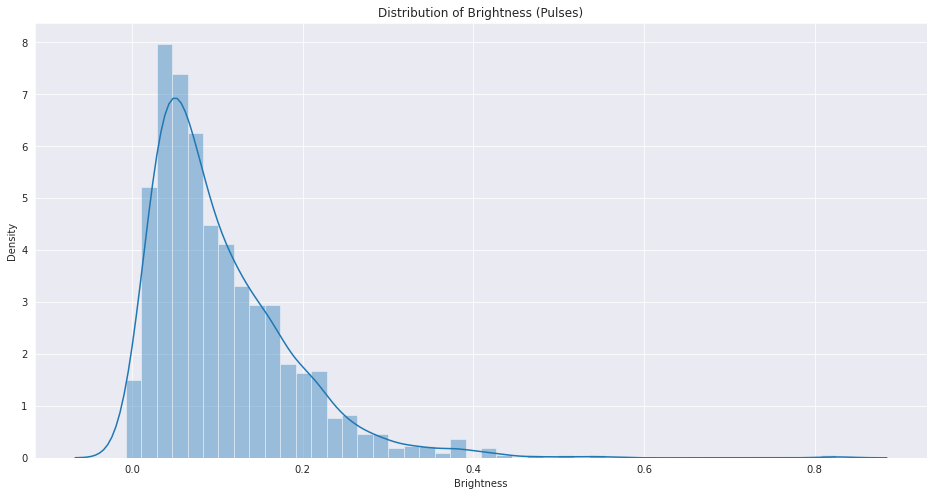

In [161]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar5.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Brightness (Pulses)')

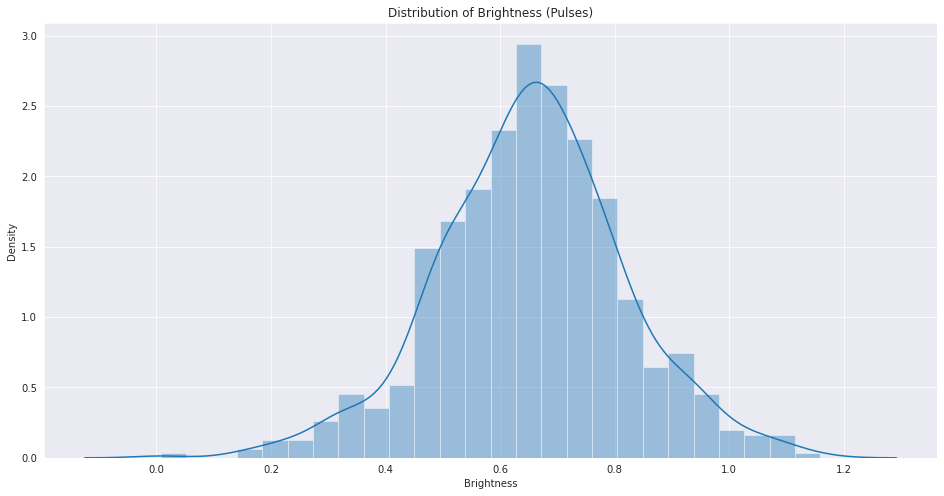

In [162]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Brightness)
plt.title("Distribution of Brightness (Pulses)")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

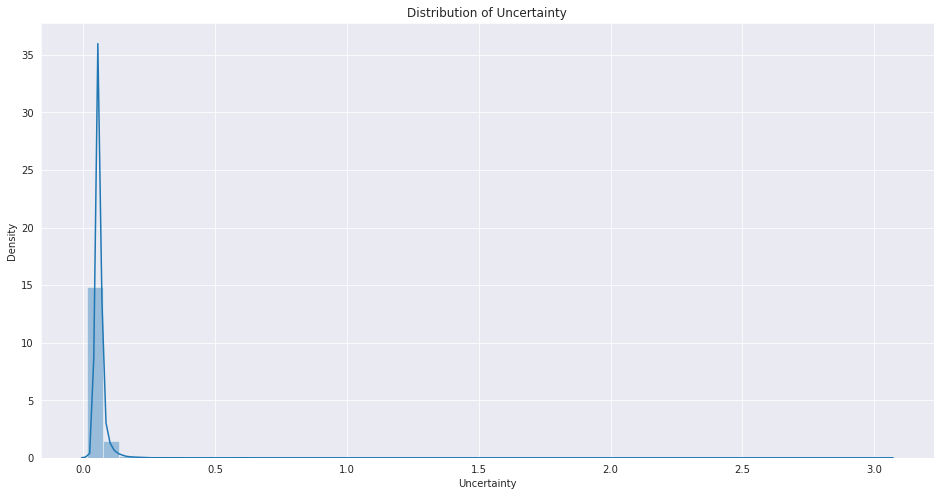

In [163]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar1.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

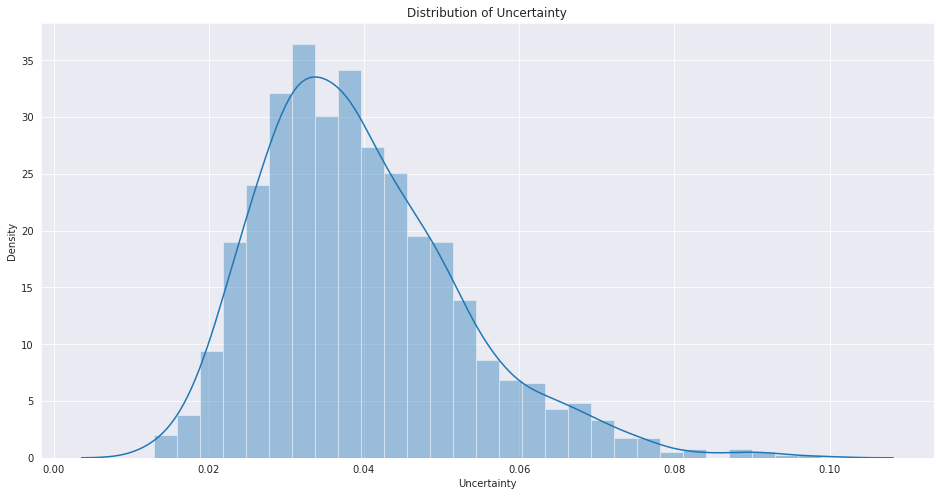

In [164]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar2.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

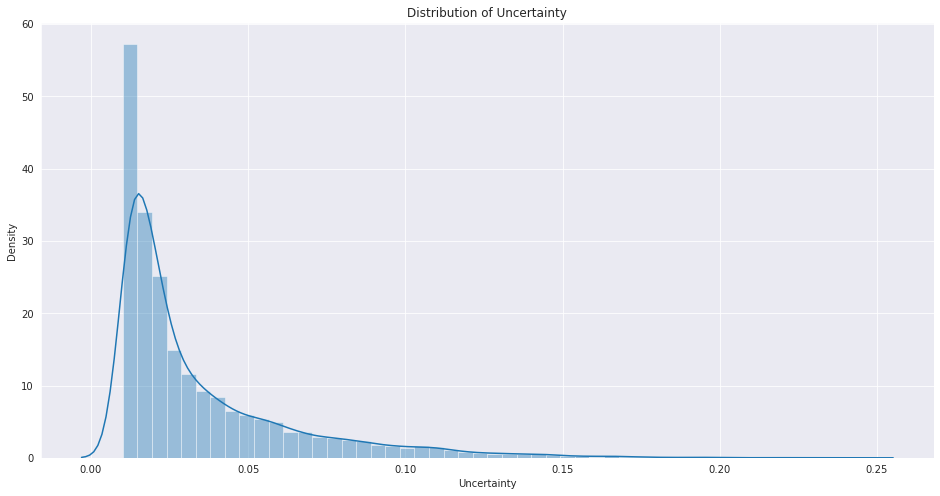

In [165]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar3.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

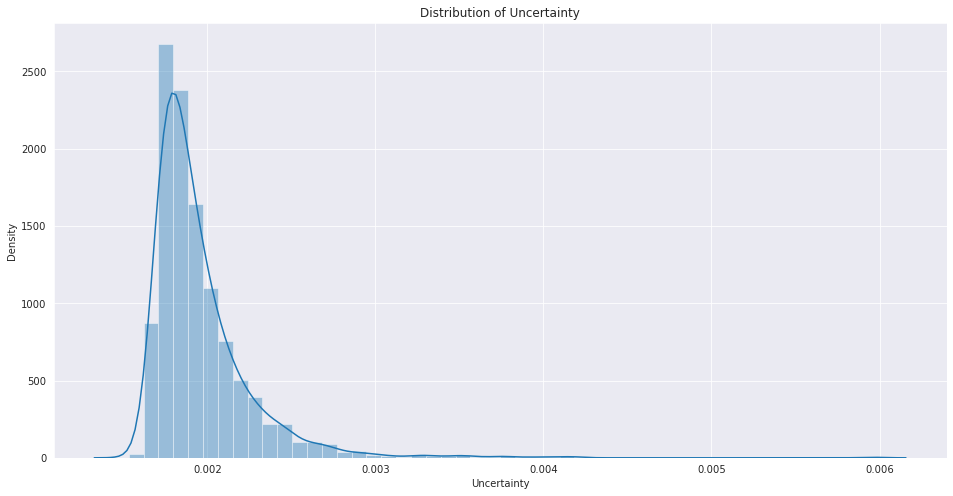

In [166]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar4.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

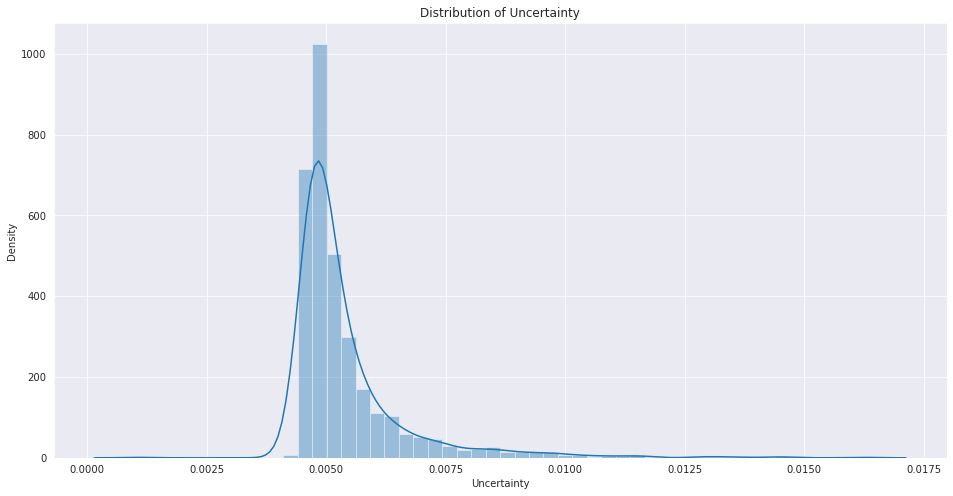

In [167]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar5.Uncertainty)
plt.title("Distribution of Uncertainty")

c:\Users\oxlay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Uncertainty')

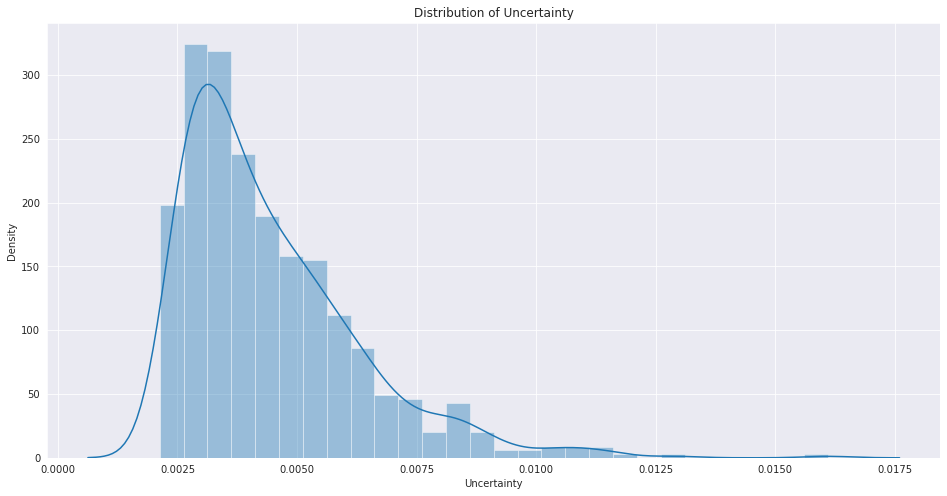

In [168]:
plt.figure(figsize=(16,8))
with sns.axes_style('darkgrid'):
    sns.distplot(pulsar6.Uncertainty)
plt.title("Distribution of Uncertainty")

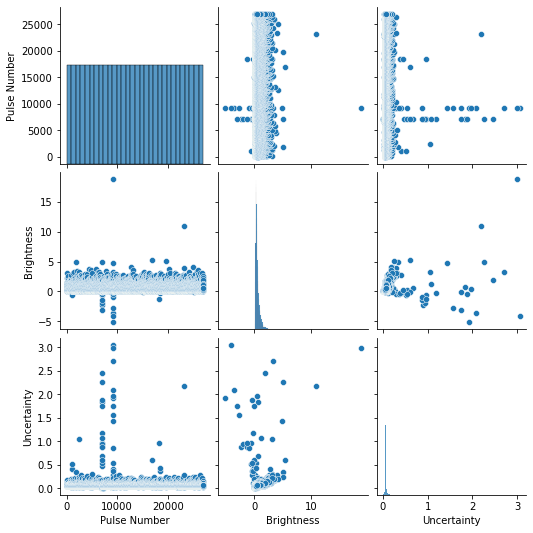

In [169]:
sns.pairplot(pulsar1)

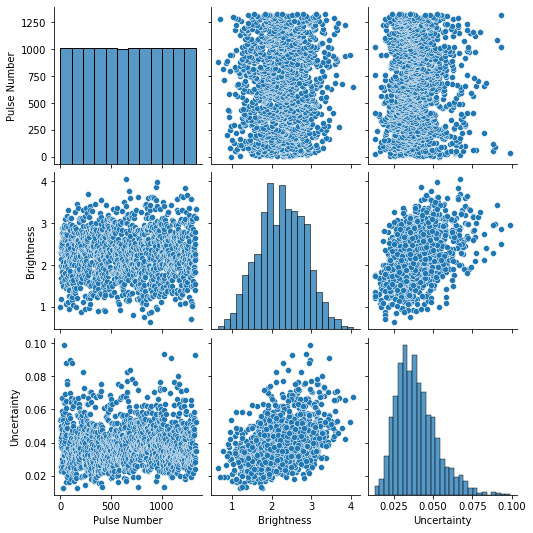

In [170]:
sns.pairplot(pulsar2)

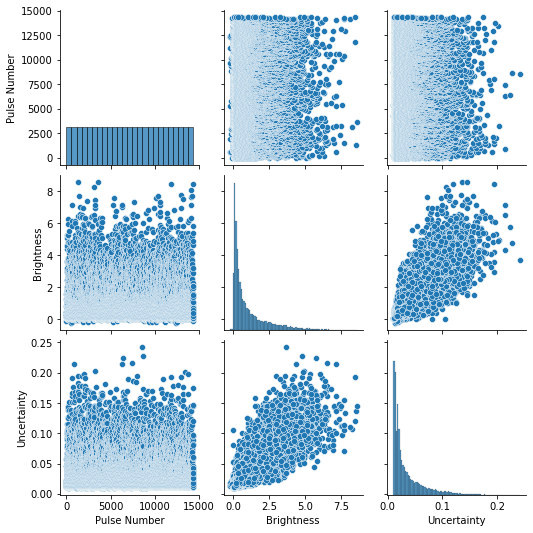

In [171]:
sns.pairplot(pulsar3)

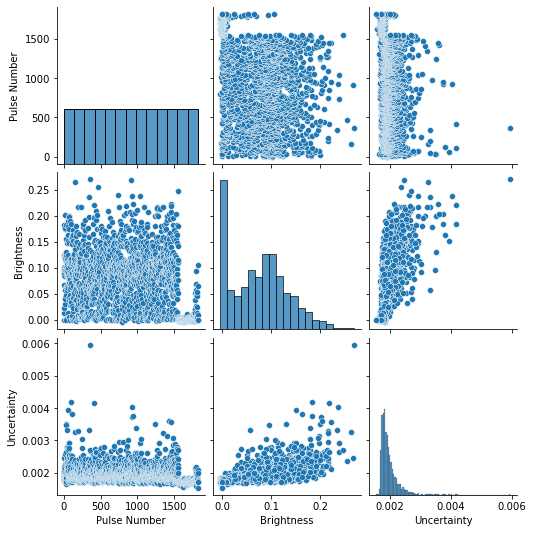

In [172]:
sns.pairplot(pulsar4)

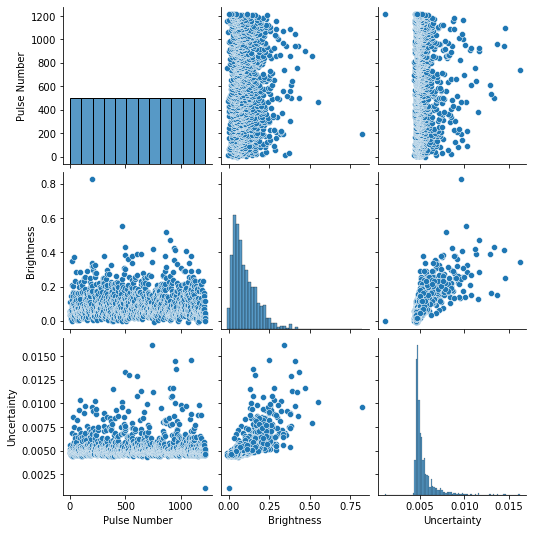

In [173]:
sns.pairplot(pulsar5)

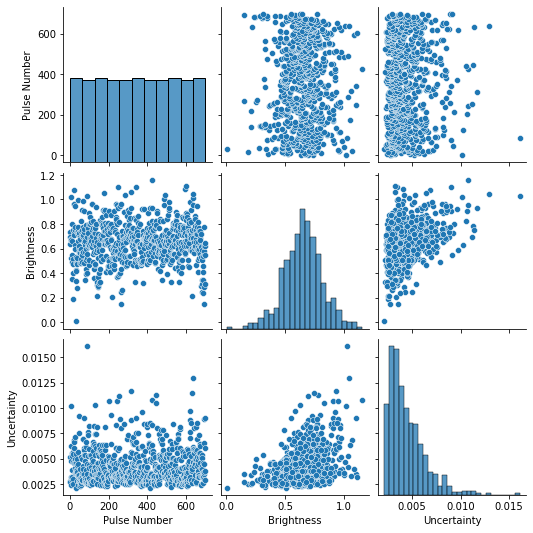

In [174]:
sns.pairplot(pulsar6)

In [175]:
pulsar1corr, _ = pearsonr(pulsar1.Brightness, pulsar1.Uncertainty)
print('Pulsar 1 --- Pearsons Corr: %.3f' % pulsar1corr)

Pulsar 1 --- Pearsons Corr: 0.291


In [176]:
pulsar2corr, _ = pearsonr(pulsar2.Brightness, pulsar2.Uncertainty)
print('Pulsar 2 --- Pearsons Corr: %.3f' % pulsar2corr)

Pulsar 2 --- Pearsons Corr: 0.435


In [177]:
pulsar3corr, _ = pearsonr(pulsar3.Brightness, pulsar3.Uncertainty)
print('Pulsar 3 --- Pearsons Corr: %.3f' % pulsar3corr)

Pulsar 3 --- Pearsons Corr: 0.843


In [178]:
pulsar4corr, _ = pearsonr(pulsar4.Brightness, pulsar4.Uncertainty)
print('Pulsar 4 --- Pearsons Corr: %.3f' % pulsar4corr)

Pulsar 4 --- Pearsons Corr: 0.604


In [179]:
pulsar5corr, _ = pearsonr(pulsar5.Brightness, pulsar5.Uncertainty)
print('Pulsar 5 --- Pearsons Corr: %.3f' % pulsar5corr)

Pulsar 5 --- Pearsons Corr: 0.709


In [180]:
pulsar6corr, _ = pearsonr(pulsar6.Brightness, pulsar6.Uncertainty)
print('Pulsar 6 --- Pearsons Corr: %.3f' % pulsar6corr)

Pulsar 6 --- Pearsons Corr: 0.404
